# reading data properly

In [16]:
import matplotlib
from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

teen_crime = pd.read_csv("data/crime_teenager.csv", encoding='euc_kr')
night = pd.read_csv("data/nightlife_crime.csv", encoding='euc_kr')

In [3]:
teen_crime.head()


,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


In [4]:
night.head()

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,637,0,6,19,140,176,3,21,310,2484,2604
1,강동,146,106,252,0,3,6,193,158,4,6,156,2366,2712
2,강북,79,128,207,0,0,9,166,210,7,14,153,1434,2649
3,강서,113,167,280,0,3,9,273,240,7,13,262,2096,3207
4,관악,223,99,322,0,2,14,170,209,9,12,320,2706,3298


In [5]:
night.isnull().sum().sum()

0

# data preprocessing

In [6]:
night.describe().round()

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
count,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
mean,93.0,122.0,215.0,0.0,2.0,10.0,147.0,146.0,6.0,11.0,199.0,1990.0,2370.0
std,83.0,70.0,139.0,0.0,2.0,6.0,52.0,70.0,3.0,5.0,81.0,665.0,701.0
min,7.0,52.0,74.0,0.0,0.0,3.0,56.0,65.0,1.0,2.0,70.0,851.0,1201.0
25%,30.0,81.0,110.0,0.0,0.0,6.0,119.0,76.0,3.0,7.0,126.0,1557.0,1852.0
50%,71.0,105.0,175.0,0.0,2.0,8.0,146.0,144.0,5.0,9.0,194.0,1982.0,2548.0
75%,113.0,129.0,278.0,0.0,4.0,12.0,170.0,193.0,8.0,14.0,281.0,2484.0,2847.0
max,283.0,354.0,637.0,1.0,6.0,29.0,273.0,337.0,14.0,22.0,334.0,3239.0,3572.0


In [7]:
# 살인은 표본이 너무 적기에 삭제 

df = night.copy()
df = night.drop(df.loc[:,df.columns.str.contains('murder')], axis=1)
df = df.drop(['tot_nightlife'], axis =1)

In [8]:
df.head()

,region,pub,karaoke,robbery,forcible_rape,thef,violence,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,283,354,6,19,140,176,21,310,2484,2604
1,강동,146,106,3,6,193,158,6,156,2366,2712
2,강북,79,128,0,9,166,210,14,153,1434,2649
3,강서,113,167,3,9,273,240,13,262,2096,3207
4,관악,223,99,2,14,170,209,12,320,2706,3298


In [9]:
#절도와 강도를 강도로 병합, 주점과 노래방을 유흥업소로 병합

df['thef'] = df['thef']+ df['robbery']
df['thef_tot'] = df['thef_tot']+ df['robbery_Tot']
df = df.drop(df.loc[:,df.columns.str.contains('robber')], axis=1)

df['pub'] = df['pub'] + df['karaoke']
df = df.drop(['karaoke'], axis = 1)

In [10]:
df.head()

,region,pub,forcible_rape,thef,violence,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,637,19,146,176,310,2505,2604
1,강동,252,6,196,158,156,2372,2712
2,강북,207,9,166,210,153,1448,2649
3,강서,280,9,276,240,262,2109,3207
4,관악,322,14,172,209,320,2718,3298


In [11]:
#전체 범죄 발생건수에서 청소년범죄 건수를 빼서 성인 범죄 발생건수만 센다.

df['thef_tot'] = df['thef_tot'] - df['thef']
df['violence_Tot'] = df['violence_Tot'] - df['violence']
df['forcible_rape_Tot'] = df['forcible_rape_Tot'] - df['forcible_rape']
df.head()

,region,pub,forcible_rape,thef,violence,forcible_rape_Tot,thef_tot,violence_Tot
0,강남,637,19,146,176,291,2359,2428
1,강동,252,6,196,158,150,2176,2554
2,강북,207,9,166,210,144,1282,2439
3,강서,280,9,276,240,253,1833,2967
4,관악,322,14,172,209,306,2546,3089


# data visualization
- 전체범죄율과 청소년범죄율의 상관관계 
- 유흥업소의 수와 범죄율의 상관관계
- 지역별 범죄율

<AxesSubplot:>

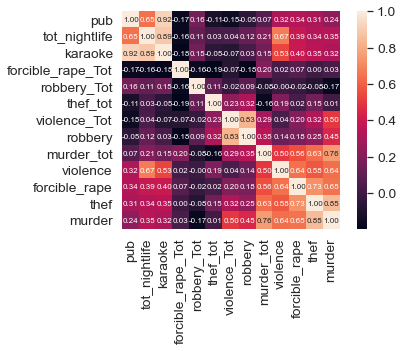

In [12]:
# 전 특성에 관련한 히트맵

sns.set(font_scale=1.25)
data = night.corr()
cols = data.nlargest(13, 'pub').index 
# nlargest : Return this many descending sorted values
#sns.heatmap(data = nightlife_crime.corr(method = 'pearson'),linewidths=.5,cmap="RdGy")
hm = sns.heatmap(data, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
hm

<AxesSubplot:>

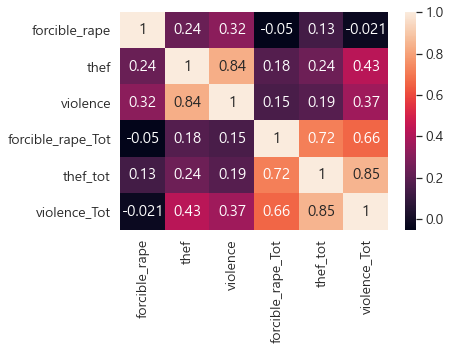

In [19]:
# 전처리 이후에 관련한 히트맵
sns.heatmap(graph.corr(), annot=True)

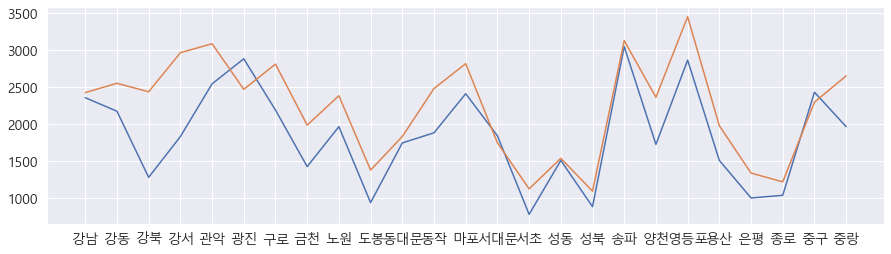

In [17]:
#히트맵 상관계수로 유추한 상관도

plt.figure(figsize=(15,4))
plt.plot(df['region'],df['thef_tot'])
plt.plot(df['region'],df['violence_Tot'])

<BarContainer object of 25 artists>

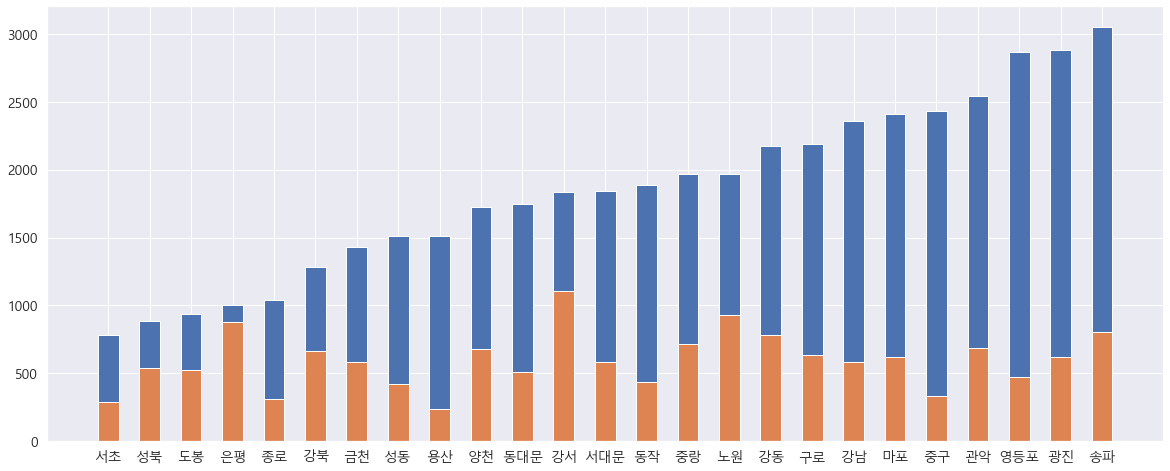

In [18]:
graph = df.drop(['region','pub'],axis=1)
graph_thef = df.sort_values('thef_tot')

# 성인 강도발생률과 청소년 강도발생률 비교
# 관측의 편의를 위해 청소년 수치에 4를 곱했다. 
plt.figure(figsize=(20,8))
plt.bar(graph_thef['region'], graph_thef['thef_tot'], width=0.5)
plt.bar(graph_thef['region'], graph_thef['thef']*4, width=0.5)

In [20]:
# 유흥업소 하나당 범죄율
graph_per = graph.div(df['pub'], axis=0)
graph_per.head()

,forcible_rape,thef,violence,forcible_rape_Tot,thef_tot,violence_Tot
0,0.029827,0.229199,0.276295,0.456829,3.703297,3.811617
1,0.023810,0.777778,0.626984,0.595238,8.634921,10.134921
2,0.043478,0.801932,1.014493,0.695652,6.193237,11.782609
3,0.032143,0.985714,0.857143,0.903571,6.546429,10.596429
4,0.043478,0.534161,0.649068,0.950311,7.906832,9.593168


<AxesSubplot:>

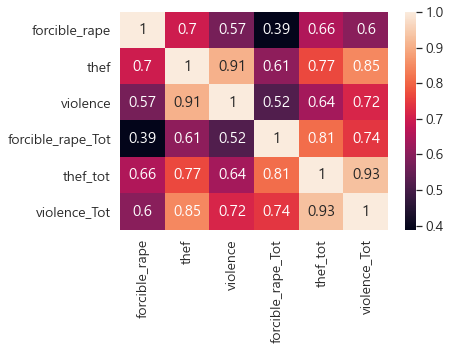

In [21]:
sns.heatmap(graph_per.corr(),annot=True)

In [22]:
graph_per = pd.concat([df['region'] ,graph_per], axis=1).sort_values('thef_tot')

graph_per.head()

,region,forcible_rape,thef,violence,forcible_rape_Tot,thef_tot,violence_Tot
22,종로,0.016260,0.208672,0.233062,0.300813,2.815718,3.308943
0,강남,0.029827,0.229199,0.276295,0.456829,3.703297,3.811617
14,서초,0.033654,0.346154,0.360577,0.302885,3.754808,5.413462
21,은평,0.051724,0.943966,1.086207,0.379310,4.323276,5.775862
19,영등포,0.012170,0.241379,0.239351,0.586207,5.815416,7.006085


<BarContainer object of 25 artists>

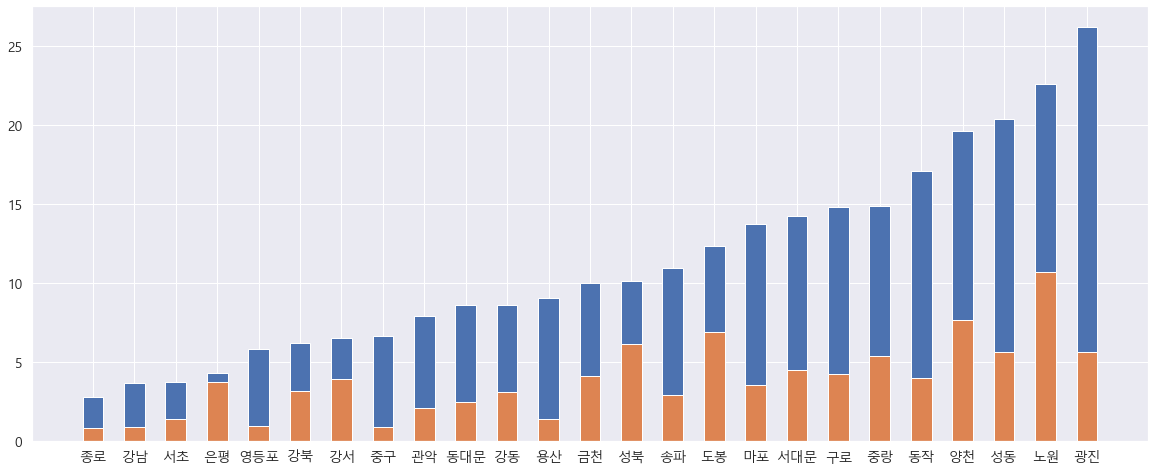

In [23]:
plt.figure(figsize=(20,8))
plt.bar(graph_per['region'], graph_per['thef_tot'], width=0.5)
plt.bar(graph_per['region'], graph_per['thef']*4, width=0.5)

In [24]:
crime = teen_crime

In [25]:
crime.head()

,location,murder,robbery,forcible_rape,thief,violence
0,중 부,0,0,1,44,42
1,종 로,0,3,4,34,57
2,남대문,0,0,0,43,4
3,서대문,0,4,5,142,103
4,혜 화,0,2,2,38,29


<BarContainer object of 31 artists>

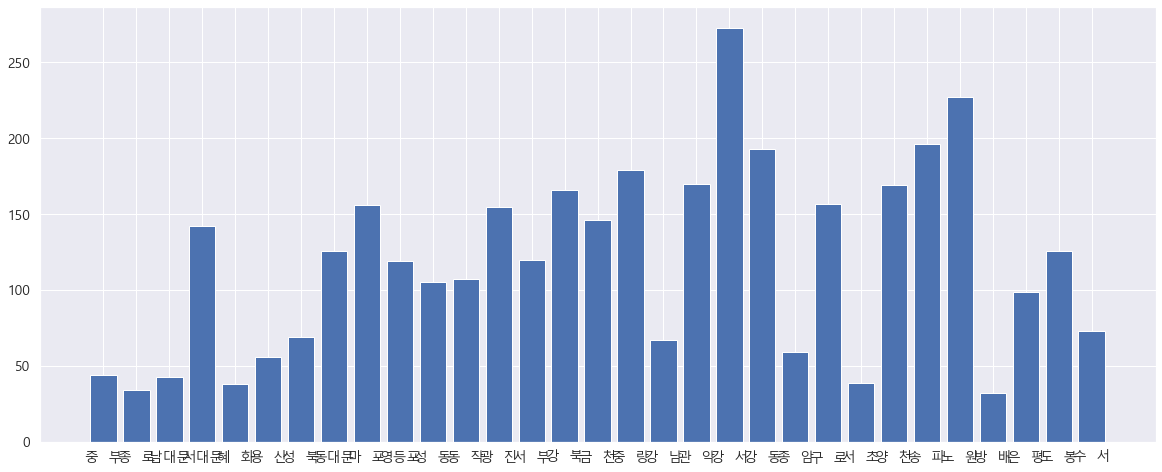

In [26]:
plt.figure(figsize=(20,8))
plt.bar(crime['location'], crime['thief'])

In [27]:
temp = pd.concat([graph_per.sort_index()['thef_tot'],graph['thef_tot']], axis=1)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

temp2 = mms.fit_transform(temp)
temp3 = pd.DataFrame(temp2)
temp3


,0,1
0,0.037912,0.695461
1,0.248561,0.614808
2,0.144267,0.220802
3,0.159353,0.463640
4,0.217462,0.777876
5,1.000000,0.927281
6,0.512358,0.621860
7,0.308975,0.284707
8,0.845458,0.522697
9,0.408034,0.070075


<BarContainer object of 25 artists>

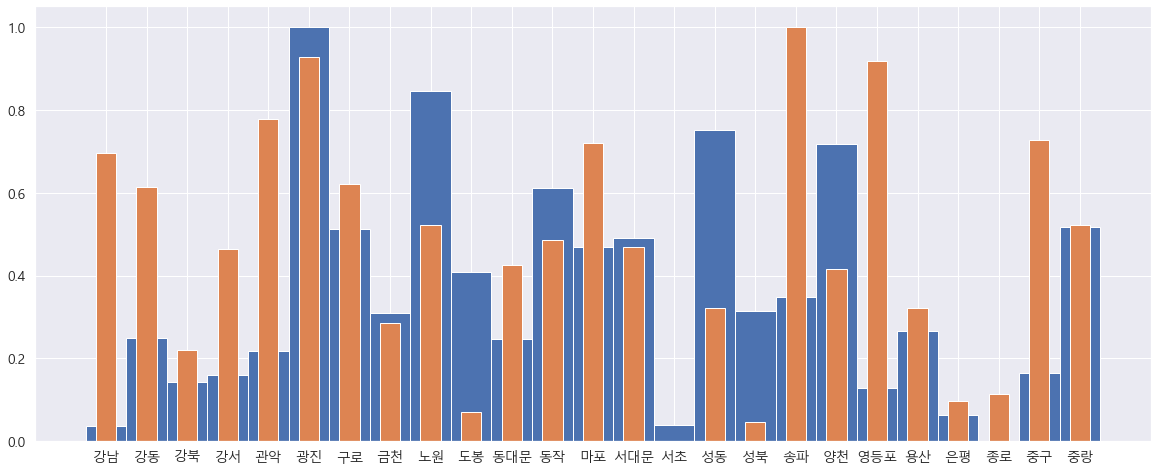

In [28]:
plt.figure(figsize=(20,8))
plt.bar(df['region'], temp3[0], width=1)
plt.bar(df['region'], temp3[1], width=0.5)


In [33]:


#plt.scatter(graph['thef'], graph['violence'])

graph = pd.concat([df['region'] ,graph], axis=1)

In [40]:
x =graph['thef']
y= graph['violence']
region = graph['region']

In [41]:



for i,type1 in enumerate(graph):
    x= gra
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.3, y+0.3, type1, fontsize=9)
plt.show()

NameError: name 'gra' is not defined

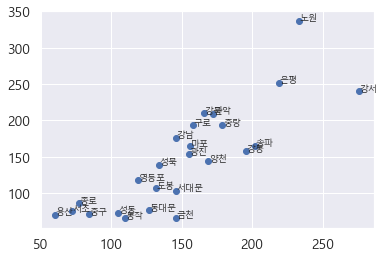

In [43]:
x =graph['thef']
y= graph['violence']
region = graph['region']

plt.scatter(x,y)
for a in range(len(x)):
    plt.text(x[a]+0.3,y[a]+0.3,region[a], fontsize =9)

In [ ]:
sklearn.